In [2]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df = pd.read_csv('train.csv')


# Exploratory Data Analysis

__Descriptive Statistics__

First, we will gather some basic understanding of the dataset by displaying its head, shape and some info about its columns

In [3]:
df.head(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [5]:
df.dtypes
# get the number of numerical and categorical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
print(f'Number of numerical columns: {len(numerical_cols)}')
print(f'Number of categorical columns: {len(categorical_cols)}')

Number of numerical columns: 26
Number of categorical columns: 9


In [6]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


The ID column holds no information value for our purposes, so we can drop it.

In [7]:
df.drop('ID', axis=1, inplace=True)

__Univariate analysis__

We will first show histograms of the numerical columns to analyze their distributions.

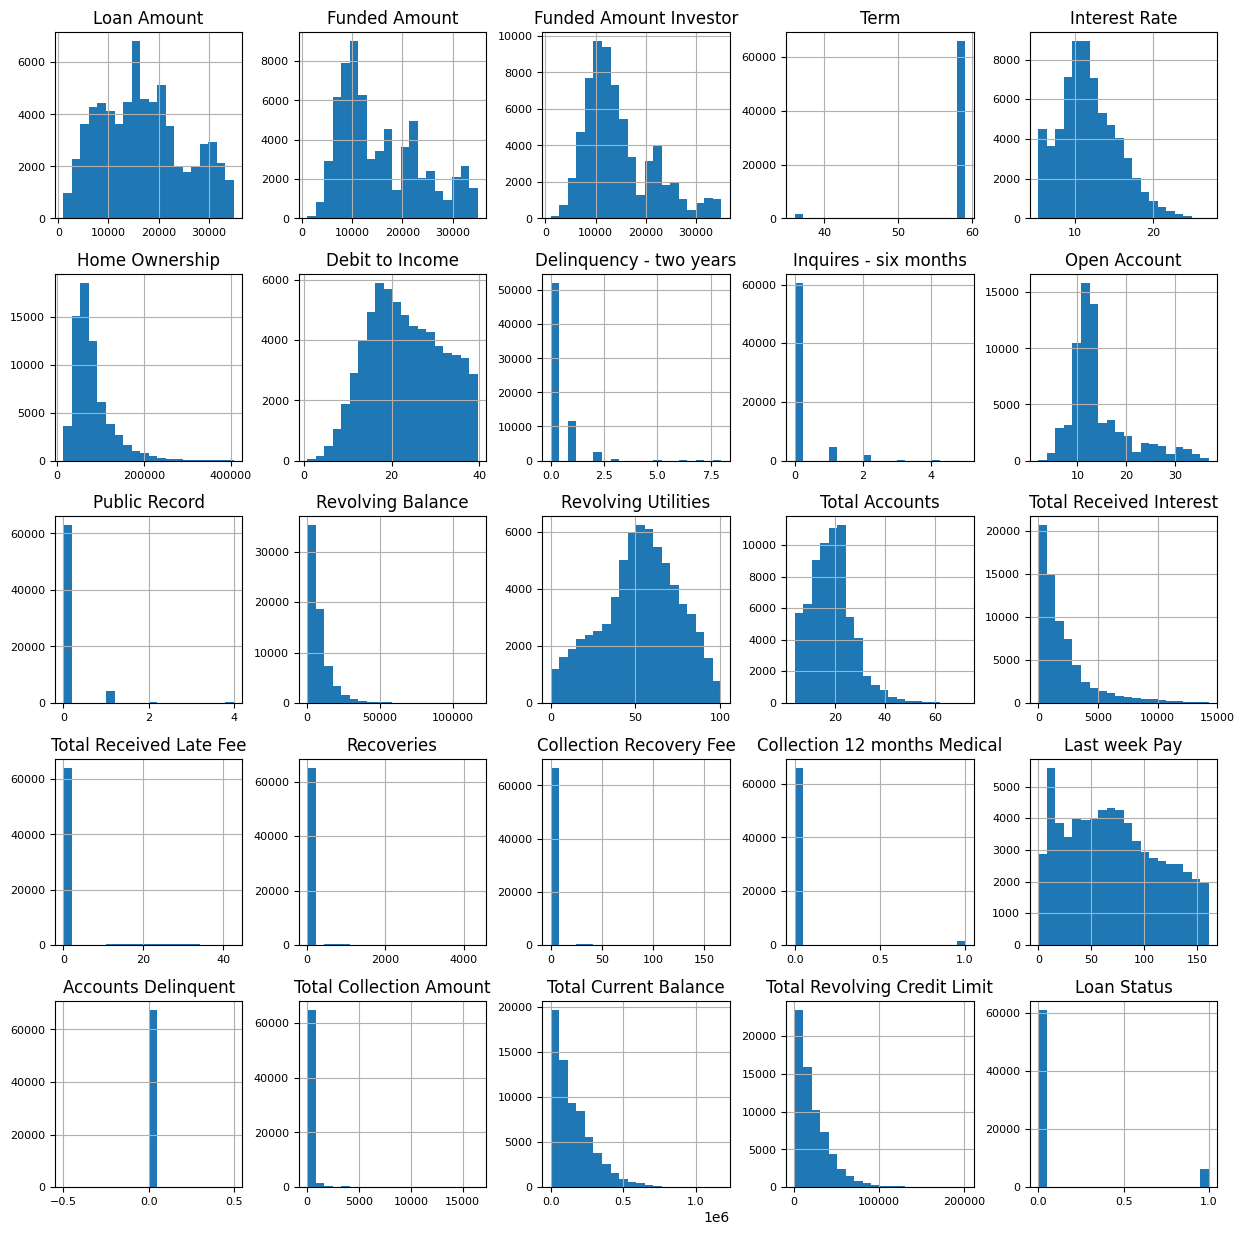

In [8]:
df.hist(figsize=(15, 15), bins=20, xlabelsize=8, ylabelsize=8);
plt.show()

From this univariate analysis plots and descriptive statistics, we see a couple of things.  
1. The average Loan amount is 16849 (rupees), with the median being 16073. The values are quite close, indicating there should not be a lot of outliers.  
2. Lot of the columns have most of their values in a small range close to zero (0 to 10) (like _Total Collection Amount_, _Collection Recovery Fee_, _Deliquency - two years_). It would seem that this is because most of the loaners did not default.  
3. Most of the loaners (~91 %) end up NOT defaulting on their loan, which is a huge imbalance.   
4. The 'Accounts Delinquent' column has only one value, so we can drop it.

In [19]:
print(f'Number of values between 0 and 10 in Recoveries column: {len(df[(df["Recoveries"] > 0) & (df["Recoveries"] < 10)])}')
print(f'Number of values between 0 and 10 in Total Received Late Fee column: {len(df[(df["Total Received Late Fee"] > 0) & (df["Total Received Late Fee"] < 10)])}')
print(f'Number of values between 0 and 100 in Total Collection Amount column: {len(df[(df["Total Collection Amount"] > 0) & (df["Total Collection Amount"] < 100)])}')

Number of values between 0 and 10 in Recoveries column: 64818
Number of values between 0 and 10 in Total Received Late Fee column: 64478
Number of values between 0 and 100 in Total Collection Amount column: 62679


In [27]:
print(df['Loan Status'].value_counts(normalize=True))

Loan Status
0    0.90749
1    0.09251
Name: proportion, dtype: float64


In [23]:
df = df.drop(['Accounts Delinquent'], axis=1)

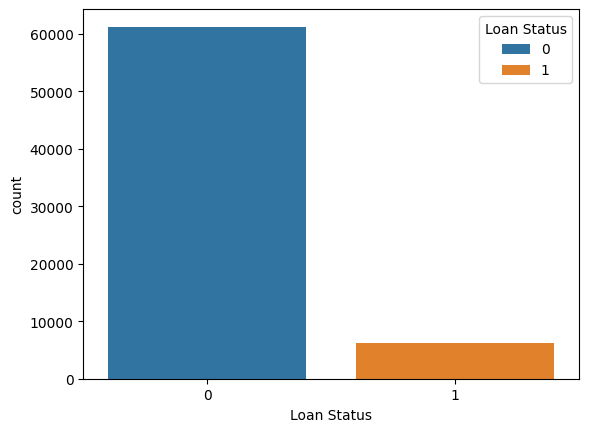

In [31]:
sns.countplot(x='Loan Status', data=df,hue='Loan Status');

We see that most of the loaners end up NOT defaulting (0).

In [9]:
import numpy as np
import scipy.stats as sp

# find the z-score for each numeric feature
z = np.abs(sp.stats.zscore(df.select_dtypes(include='number')))


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0.818483,2.020064,0.337854,0.248297,0.191268,2.127642,0.829943,0.840164,0.307961,0.203463,...,0.198674,0.160195,0.094966,0.147527,0.511670,NaN,0.155120,1.091309,0.789041,0.319281
1,1.582243,0.469958,0.358098,0.248297,0.105229,0.904035,0.933158,0.408459,0.307961,0.364105,...,0.211235,0.160534,0.043073,0.147527,0.873515,NaN,0.125565,0.165689,0.106997,0.319281
2,1.365603,0.792498,1.028905,0.248297,0.188142,0.243515,0.572470,0.408459,0.307961,0.042821,...,3.362623,0.155103,0.030106,0.147527,0.119201,NaN,0.151090,0.501847,0.144957,0.319281
3,0.678661,1.081668,0.479766,0.248297,1.313651,0.616163,0.621824,0.840164,0.307961,1.167316,...,0.209719,0.166892,0.107503,0.147527,0.742534,NaN,0.143030,1.081655,1.773285,0.319281
4,0.004911,0.312185,0.159444,0.248297,0.850331,0.806299,0.720484,0.840164,6.030678,0.203463,...,3.463301,3.459510,0.216682,0.147527,1.227349,NaN,0.380899,0.241275,0.026008,0.319281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,0.388143,1.094672,0.213184,0.248297,0.655461,0.075944,0.568625,0.840164,0.307961,0.203463,...,0.213658,1.414257,0.074476,0.147527,0.049942,NaN,0.132282,0.159683,0.534409,3.132035
67459,1.018894,0.579639,0.149686,0.248297,0.503994,0.334239,0.663171,0.408459,0.307961,0.364105,...,0.212968,0.161547,0.079725,0.147527,1.319695,NaN,0.147060,0.984534,0.688881,0.319281
67460,0.113758,2.104103,0.337840,0.248297,2.098823,1.015518,1.538551,0.408459,0.307961,1.167316,...,0.212755,0.151302,0.138101,0.147527,1.519934,NaN,0.173928,0.124310,0.918268,0.319281
67461,0.033689,1.324462,0.992129,0.248297,0.355735,0.364152,1.855781,0.408459,0.307961,0.042821,...,0.203927,0.163950,0.262914,0.147527,0.042404,NaN,0.114818,1.451211,0.762650,0.319281


In [46]:
# how many of the patients with medical collection in the last 12 months defaulted
print(df.groupby('Collection 12 months Medical')['Loan Status'].value_counts())
print(df.groupby('Inquires - six months')['Loan Status'].value_counts())

Collection 12 months Medical  Loan Status
0                             0              59916
                              1               6110
1                             0               1306
                              1                131
Name: count, dtype: int64
Inquires - six months  Loan Status
0                      0              54887
                       1               5599
1                      0               4147
                       1                411
2                      0               1846
                       1                196
3                      0                292
                       1                 28
4                      0                 47
                       1                  7
5                      0                  3
Name: count, dtype: int64


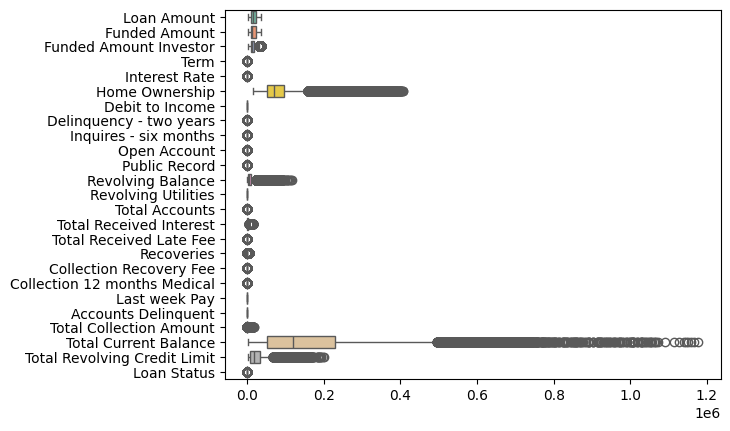

In [16]:
sns.boxplot(data=df.select_dtypes(include='number'), orient='h', palette='Set2')
plt.show()

Home Ownership                Term                           -0.021813
Total Current Balance         Revolving Utilities            -0.019785
Last week Pay                 Open Account                   -0.013415
Interest Rate                 Term                           -0.012688
                              Last week Pay                  -0.012652
                                                                ...   
Debit to Income               Home Ownership                  0.022781
Total Revolving Credit Limit  Revolving Balance               0.023366
Total Accounts                Total Revolving Credit Limit    0.032492
ID                            ID                              1.000000
                              Accounts Delinquent                  NaN
Length: 302, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

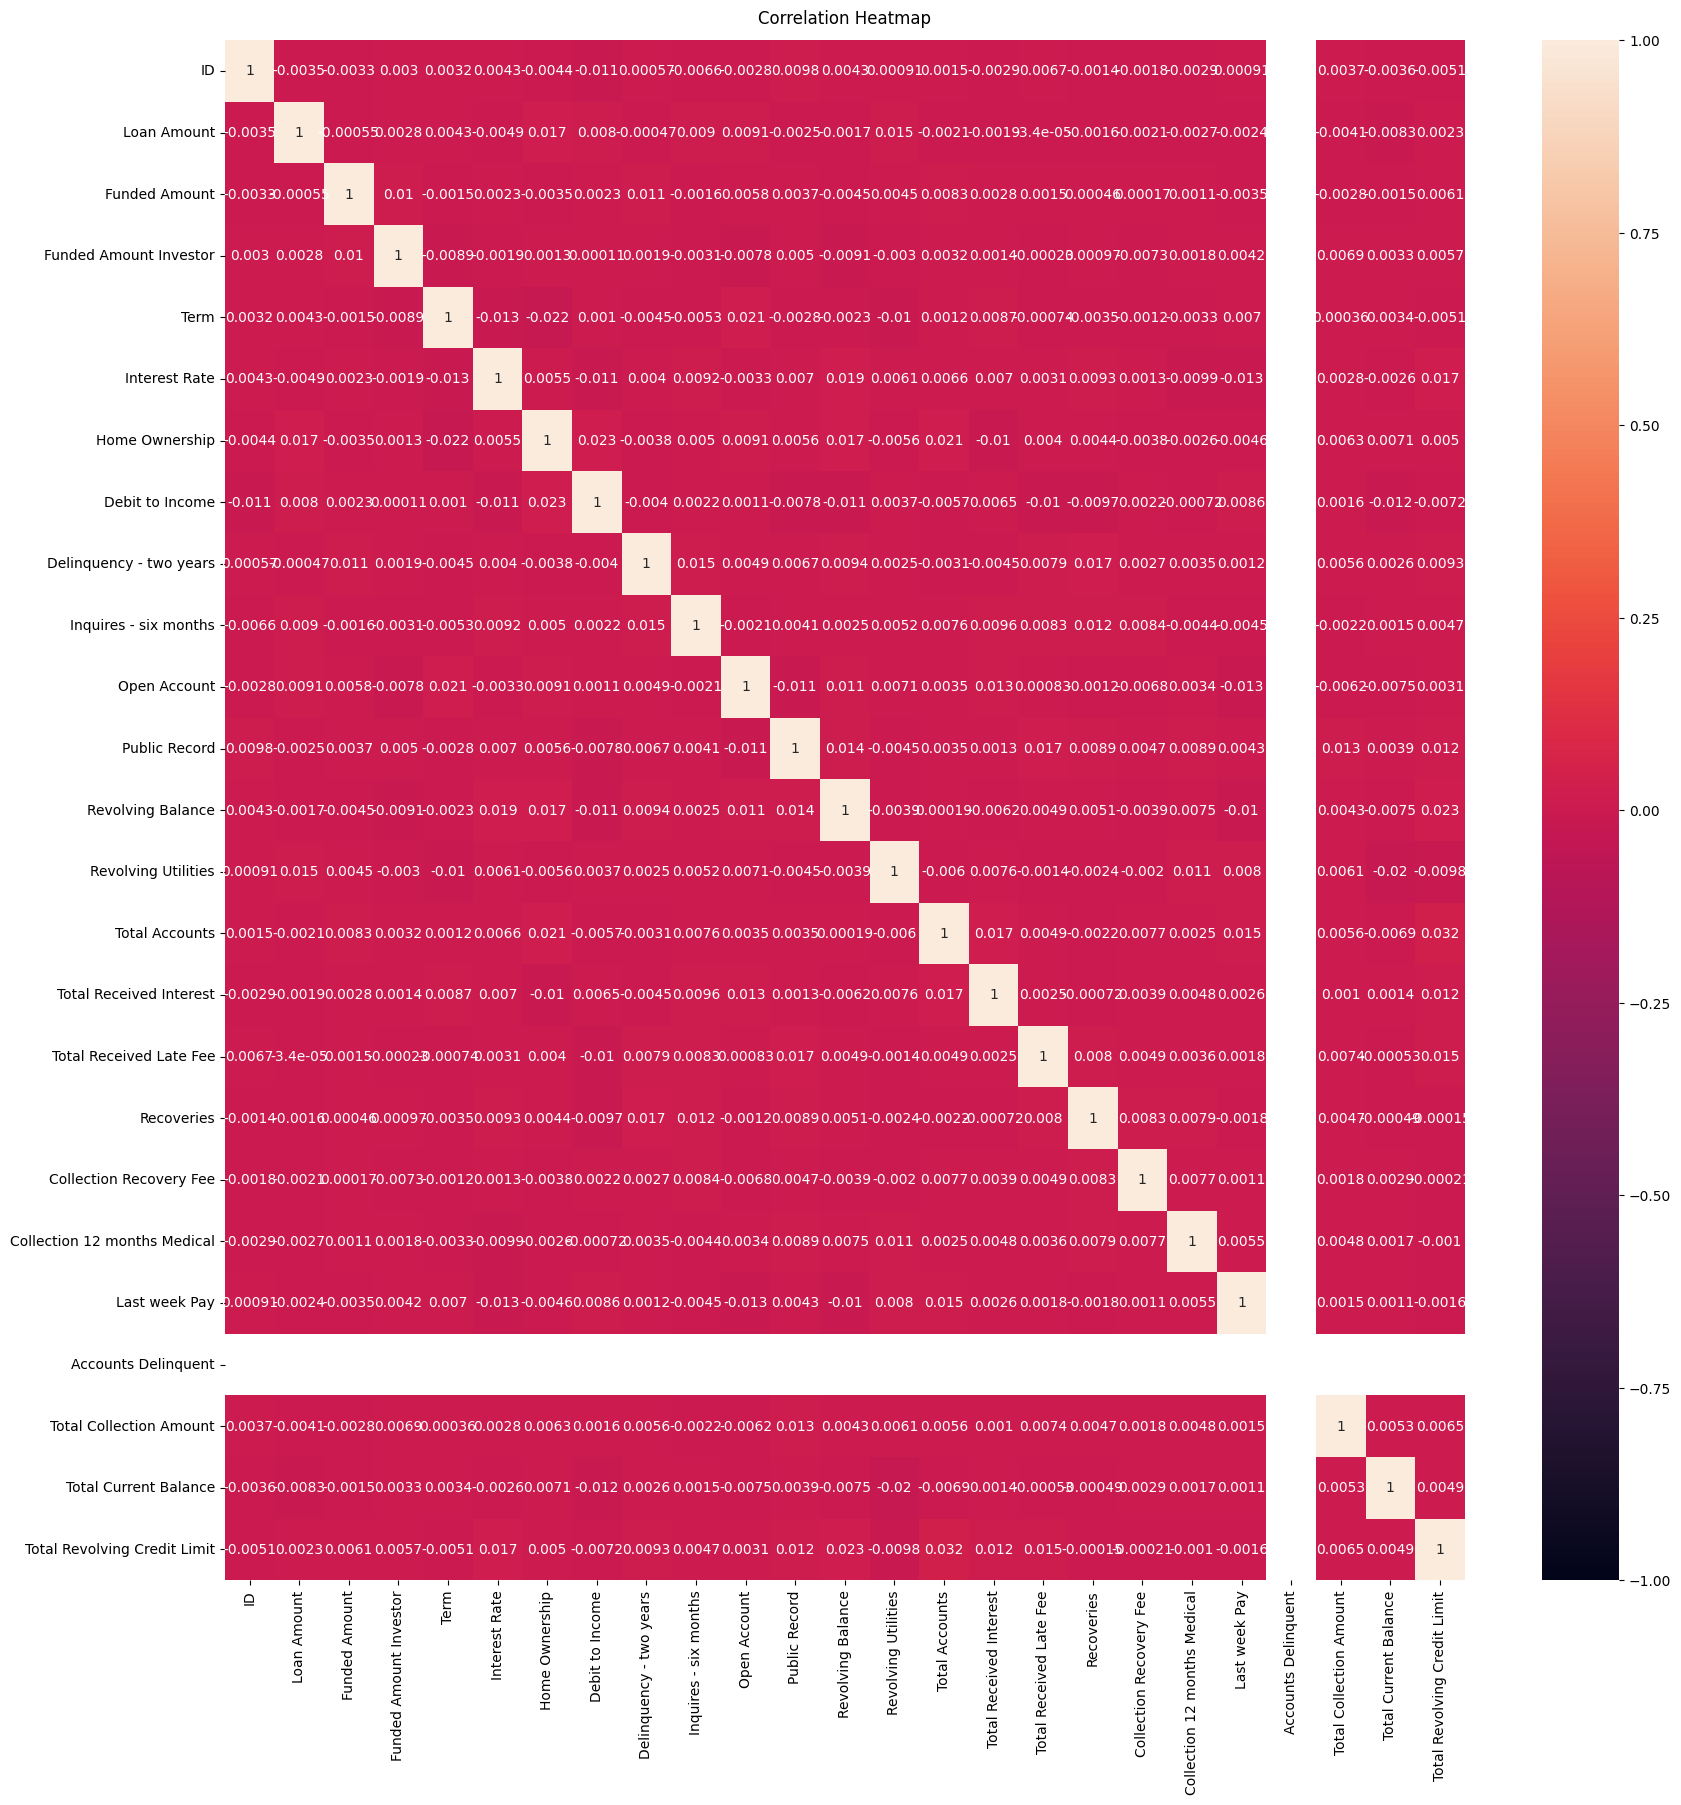

In [63]:
plt.figure(figsize = (20, 20))
correlation = df.drop('Loan Status', axis=1).corr(numeric_only=True)
print(df.corr(numeric_only=True).unstack().sort_values().drop_duplicates())
heatmap = sns.heatmap(df.drop('Loan Status', axis=1).corr(numeric_only=True),annot=True, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [ ]:
i = 0
f, axes = plt.subplots(nrows=30, figsize=(15, 150))

# sns.scatterplot(x=df['Loan Amount'], y=df['Total Received Interest'], hue=df['Loan Status'])
# plt.title('Scatter Plot of Loan Amount vs Total Received Interest by Loan Status')
# plt.xlabel('Loan Amount')
# plt.ylabel('Total Received Interest')
# plt.show()

for column in df.columns:
    if column in ['ID','Loan Status']:
        continue

    if df[column].dtype in ['int64', 'float64']:
    
    
        sns.boxplot(x=df['Loan Status'], y=df[column],ax=axes[i])
        axes[i].title.set_text(f'Box Plot of {column} by Loan Status')
        # plt.xlabel('Loan Status')
        # plt.ylabel('Loan Amount')
    i = i + 1

plt.tight_layout()
plt.show()

In [56]:
# show the correlation of features to the target variable
df.corr(numeric_only=True)['Loan Status'].sort_values(ascending=False)

Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Total Collection Amount         0.007892
Last week Pay                   0.006117
Revolving Utilities             0.004120
Home Ownership                  0.003716
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Inquires - six months           0.000578
Total Accounts                  0.000222
Funded Amount Investor         -0.000091
Recoveries                     -0.000652
Collection 12 months Medical   -0.000686
Revolving Balance              -0.001073
Debit to Income                -0.003057
Term                           -0.003410
Collection Recovery Fee        -0.003828
Loan Amount                    -0.004473
Open Account                   -0.007073
Accounts Delinqu

__Data vizualization__

In [ ]:
i = 0
f, axes = plt.subplots(nrows=21, ncols=2, figsize=(50, 150))

for column in df.columns:
    if column in ['ID','Loan Status']:
        continue

    if df[column].dtype in ['int64', 'float64']:
    
        axes[i,0].title.set_text(f'{column} hist')
        sns.histplot(df[column], kde=True, bins=30, ax=axes[i, 0])
        axes[i,1].title.set_text(f'{column} boxplot')
        sns.boxplot(x=df[column], ax=axes[i, 1])
        # sns.kdeplot(df[column], ax=axes[i,2])

    elif df[column].dtype == 'object':
        print(f"{column} is a categorical column.")
    
    i = i + 1

plt.tight_layout()
plt.show()

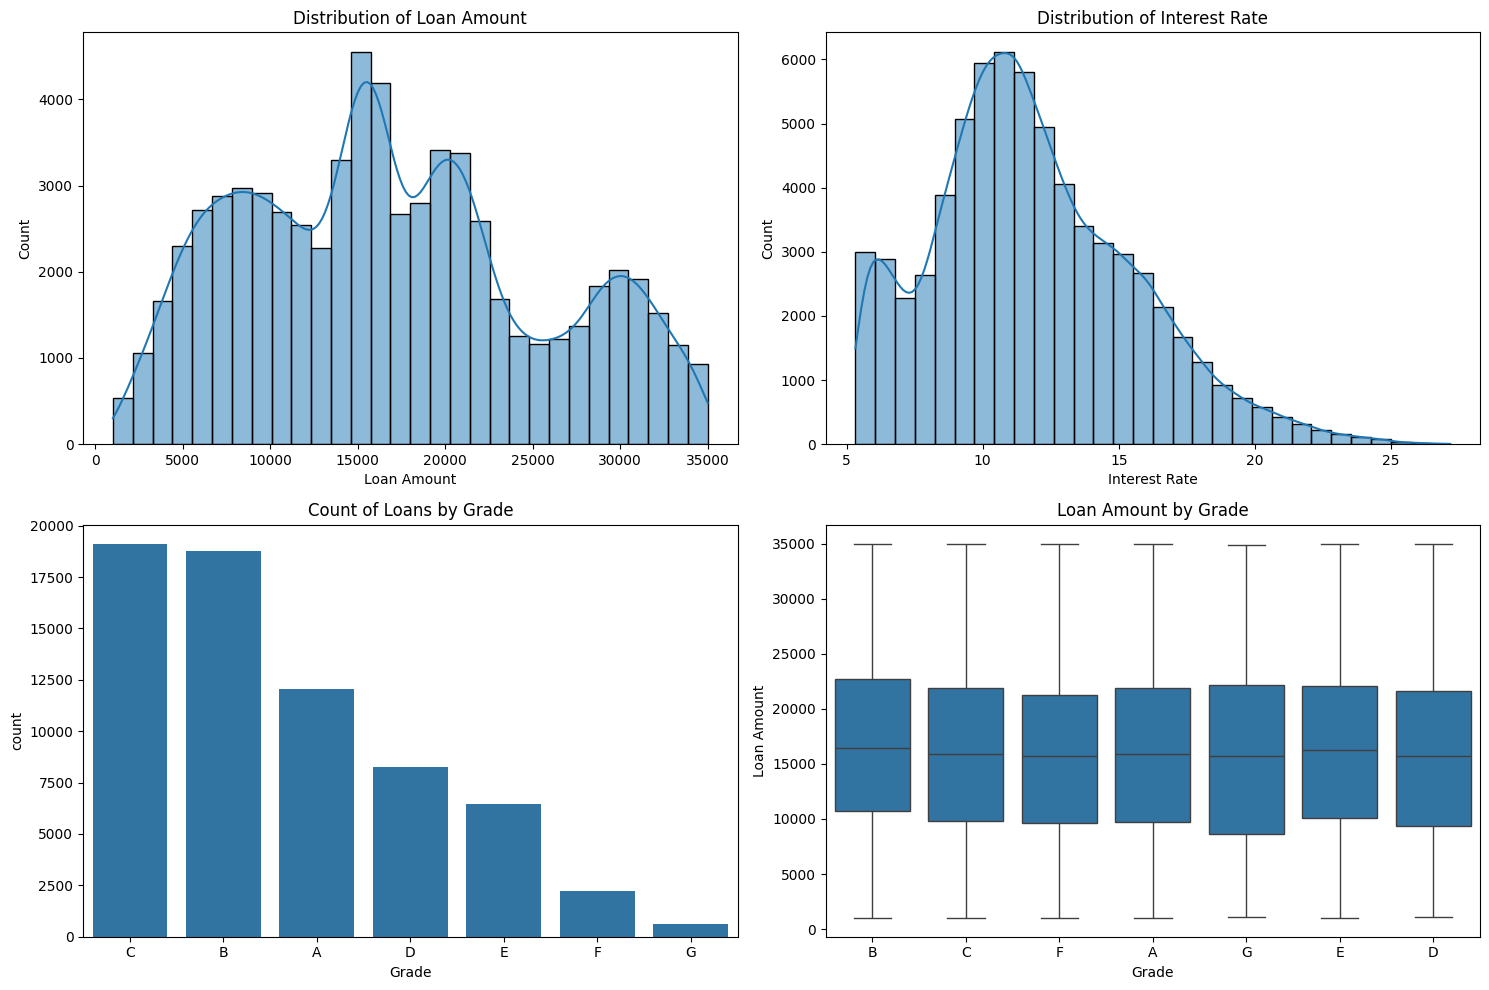

In [15]:
#Data visualization 
# Visualization of the distribution of some key numerical columns
plt.figure(figsize=(15, 10))

# Histogram for "Loan Amount"
plt.subplot(2, 2, 1)
sns.histplot(df['Loan Amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')

# Histogram for "Interest Rate"
plt.subplot(2, 2, 2)
sns.histplot(df['Interest Rate'], kde=True, bins=30)
plt.title('Distribution of Interest Rate')

# Bar plot for "Grade"
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Count of Loans by Grade')

# Box plot for "Loan Amount" by "Grade"
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Grade', y='Loan Amount')
plt.title('Loan Amount by Grade')

plt.tight_layout()
plt.show()

__DATA CLEANSING AND PRE-PROCESSING__

In [17]:
#check for missing data by rows and by columns
missing_by_columns = df.isnull().sum()
print("Missing data by columns:")
print(missing_by_columns)


Missing data by columns:
ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type       

In [52]:
df.duplicated().sum()

0

We can clearly see that no column has any missing values or duplicates, so no further action is needed in this regard.

In [6]:
numericFeatures = list(df.select_dtypes(include='number').columns) #recolhe todos os atríbutos numéricos 'number'
categFeatures = list(set(df.columns) - set(numericFeatures)) #recolhe todos os categóricos ao retirar os númericos selcionados na linha a cima
 
#Goal Attribute
goalAttrib = 'Loan Status'
#verificação de valores unicos para cada coluna categorica
for col in categFeatures:
    print(f'\nCategorias em "{col}" são:\n {df[col].unique()}')
    print(f"\nContagem de valores em {col}:\n{df[col].value_counts()}")
    print('.' * 100)


Categorias em "Payment Plan" são:
 ['n']

Contagem de valores em Payment Plan:
n    67463
Name: Payment Plan, dtype: int64
....................................................................................................

Categorias em "Grade" são:
 ['B' 'C' 'F' 'A' 'G' 'E' 'D']

Contagem de valores em Grade:
C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64
....................................................................................................

Categorias em "Initial List Status" são:
 ['w' 'f']

Contagem de valores em Initial List Status:
w    36299
f    31164
Name: Initial List Status, dtype: int64
....................................................................................................

Categorias em "Employment Duration" são:
 ['MORTGAGE' 'RENT' 'OWN']

Contagem de valores em Employment Duration:
MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64
............

In [8]:
# Get only the categorical columns
categorical_columns = df.select_dtypes(include='object')

# Use the 'describe()' method for categorical columns
categorical_columns.describe()



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


__Remove and fixing collumns__

0     n
1     n
2     n
3     n
4     n
5     n
6     n
7     n
8     n
9     n
10    n
11    n
12    n
13    n
14    n
15    n
16    n
17    n
18    n
19    n
Name: Payment Plan, dtype: object

__Creation of Models Using Data Mining Algorithms:__

Model Selection:
Choose the machine learning algorithms (Logistic Regression, Decision Tree, Naive Bayes, KNN, SVM) for prediction.

__Model Building:__
Train and build models for each chosen algorithm on the training data.
Use libraries such as scikit-learn for model building.

__Model Evaluation:__
Evaluate each model's performance using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC, etc.).

__Hyperparameter Tuning:__
Optimize model hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.

__Evaluation of the Models Created:__

__Model Comparison:__
Compare the performance of the different models.
Choose the best-performing model based on your evaluation metrics.

__Documentation and Reporting:__
Create a report or documentation summarizing the entire project, including findings and insights.
Explain the steps, methodologies, and model evaluation results.